# Introduction to Regression with Neural Network in Tensorflow

Regression is predicting a numerical variable based on some combination of variables. Or simply, predicting a number

In [1]:
#import required libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.6.0


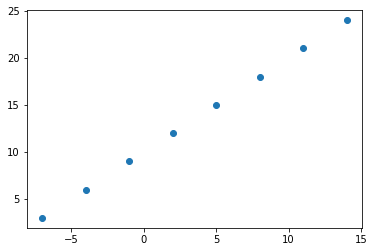

In [2]:
# create features
X = np.array([-7, -4, -1, 2, 5, 8, 11, 14])

#create labels 
y = np.array([3, 6, 9, 12, 15, 18, 21, 24])

#visualize 
plt.scatter(X, y)

In [3]:
#relationship between X and y, that we want out NN to learn
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output shapes

In [4]:
# create a demo tensor for housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape #it is empty because our tensor is a scalar

((), ())

In [6]:
#Turn the np arrays into tensor
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=int64, numpy=array([-7, -4, -1,  2,  5,  8, 11, 14])>,
 <tf.Tensor: shape=(8,), dtype=int64, numpy=array([ 3,  6,  9, 12, 15, 18, 21, 24])>)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape #it is empty because our tensor is a scalar

(TensorShape([]), TensorShape([]))

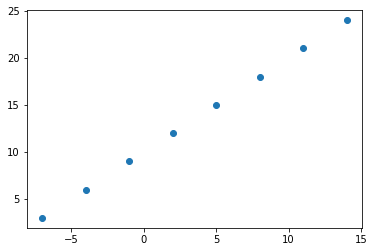

In [8]:
plt.scatter(X, y)

### Steps in modelling with tensorflow

1. **Creating a model**: define the input and output layers, as well as hidden layers of the DL model
2. **Compile the model**: define the loss function (the function that teslls our model how wrong it is) and the optimizer (tells the model how to improve the pattern it is learning), and evaluation metrics (used to interpret the performamce of our model.)
3. **Fitting the mode**l: Letting the model find pattern between the features and labels.

In [9]:
#SET SEED
tf.random.set_seed(42)

#create a model using the sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)]) #one hidden layer with a single neuron

#
#compile model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics =['mae'])

#fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 593ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mae: 10.9748


In [10]:
#check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=int64, numpy=array([-7, -4, -1,  2,  5,  8, 11, 14])>,
 <tf.Tensor: shape=(8,), dtype=int64, numpy=array([ 3,  6,  9, 12, 15, 18, 21, 24])>)

In [11]:
#try to make predicition
y_pred = model.predict([17.0])

In [12]:
y_pred + 11
#The model is wrong (even after adding the mae), thus we need to improve it

array([[23.71602]], dtype=float32)

### Improve the model

The model can be improved by altering any of the 3 steps involved.

1. **In creating of mode**: we can add more layers, increase the number of neutrons in the hidden layer/s, change activation function of each layer.
2. **Compiling a model**: change the optimization function or perhaps the learning rate o the optimisation function
3. **Fitting a model**:  add more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

* The smaller model above was created to check if things work, before creating a larger model.

In [ ]:
#Rebuild the model: increase the number of epochs only

# create the model
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# compile the model
model.compile(loss='mae', optimizer='SGD', metrics =['mae'])

#fit the model
model.fit(X, y, epochs=100)

In [ ]:
#check the prediction from the model
model.predict([17]) 
#a better prediction than the previous

In [ ]:
#Rebuild the model: increase the number of hidden layers

# create the model
model = tf.keras.Sequential([tf.keras.layers.Dense(100, activation='relu'),  
                             tf.keras.layers.Dense(1)])

# compile the model
model.compile(loss='mae', optimizer='SGD', metrics =['mae'])

#fit the model
model.fit(X, y, epochs=100)

In [ ]:
model.predict([17])
#The model is overfitting, because the loss errors are low but prediction on new data is bad

In [ ]:
#Rebuild the model: increase the number of hidden layers

# create the model
model = tf.keras.Sequential([tf.keras.layers.Dense(50, activation=None),  
                             tf.keras.layers.Dense(1)])

# compile the model
model.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics =['mae'])

#fit the model
model.fit(X, y, epochs=100)

In [ ]:
model.predict([20])

### Evaluating a model

In practice, a typical workflow you'll go through when building a Neural Network is:

```
Build a model --> fit it --> evaluate it --> tweak a model --> fit it --> evaluate it -> tweak a model -> fit it -> evaluate it... 
```

When it comes to evaluating a model, you should try to visualize things. We can

* Visualize the data
* The model
* The training of a model: how a model perform while it learns
* The predictions of the model

In [ ]:
# make a big data set
X = tf.range(-100, 100, 4)
X

In [ ]:
#make labels for the data set
y = X + 10 #this is the pattern we want the model to learn
y

In [ ]:
#visualize the data
plt.scatter(X, y)

In [ ]:
### The 3 sets... (training, validation, testing)
#Model learns from the training set. Typically 70 t0 80% of the data
#Model is tweaked on the validation data. Typically 10 - 15% of all data
#Test set is what the model gets evaluated on. Typically 10 - 15% of all data

In [ ]:
# check the length of the samples we have
len(X)

In [ ]:
#split the data into train and set sets
X_train = X[:40] #first 40 samples
X_test =  X[40:] #last 20 samples

y_train = y[:40] #first 40 samples
y_test =  y[40:] #last 20 samples

len(X_train), len(X_test), len(y_train), len(y_test)

In [ ]:
#Let's visualize the data again
plt.figure(figsize=(10, 7))
#plot the training data
plt.scatter(X_train, y_train, c = 'b', label='Training data')
#plot the test data
plt.scatter(X_test, y_test, c = 'g', label='Test data')
plt.legend()

In [ ]:
#Let's build a neural network for our data
#create a model
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

#compile model
model.compile(loss='mae', optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])

# #fit the model
# model.fit(X_train, y_train, epochs= 100)

In [ ]:
# model.summary()

In [ ]:
X[0].shape, X[0]

In [ ]:
# let's create a model that builds authomatically by defining the input shape in the first layer
# sometimes the model figures it out itself as above
tf.random.set_seed(42)

#create a model as same above
model = tf.keras.Sequential([tf.keras.layers.Dense(10, input_shape=[1])]) #Dense means fully connected layer

#compile a model
model.compile(loss='mae', optimizer='sgd', metrics=['mae'])

In [ ]:
model.summary()

* Total params - is the total parameters in the model
* Trainable parameters - are the parameters the model can update as it trains. If we are doing **transfer learning**, we may want to train a few paramaters and not all. Then we will have non-trainanble parameters.

In [ ]:
# Noe let's fit the model
# If this celll is run multiple times, the number of epochs multiplies
model.fit(X_train, y_train, epochs= 100, verbose=0)

In [ ]:
model.predict([100])

In [ ]:
model.summary()

In [ ]:
#check the structure of our model
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

In [ ]:
#create a model as same above
model = tf.keras.Sequential([ 
                             tf.keras.layers.Dense(10, input_shape=[1], name = 'input_layer'),
                             tf.keras.layers.Dense(1, name='output_layer')
                            ],  name = 'random_model') #Dense means fully connected layer

#compile a model
model.compile(loss='mae', optimizer='sgd', metrics=['mae'])
model.summary()

In [ ]:
model.fit(X_train, y_train, epochs= 100, verbose=0)

In [ ]:
model.summary()

In [ ]:
plot_model(model=model, show_shapes=True)

### Visualizing model predictions

To visualize predictions, it is nice to plot them against the true labels. This is going to be something like `y_true` versus `y_pred`.

In [ ]:
#make predictions
y_pred = model.predict(X_test)
y_pred

In [ ]:
#let's create a plotting function
def plot(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, y_pred=y_pred):
  """ plots training data, test data and compares predictions and real values"""
  plt.figure(figsize=(10, 7))
  #plot the training data
  plt.scatter(X_train, y_train, c = 'b', label='Training data')
  #plot the test data
  plt.scatter(X_test, y_test, c = 'g', label='Test data')
  #plot model's predictions in red
  plt.scatter(X_test, y_pred, c = 'r', label = 'predictions')
  plt.legend();

  return None

In [ ]:
plot(X_train, y_train, X_test, y_test, y_pred)

### Evaluating our predictions with regression evaluation metrics

The metrics to be used depends on the type of problem. Here. for regression, we can use the follwoing metrics;
* MAE: `tf.keras.losses.MAE()`, a good starter metric for any regression model
* MSE: `tf.keras.losses.MSE()`, used when larger errors are more significant than smaller erros
* Huber: `tf.keras.losses.Huber()`. Takes the combination of MSE and MAE. Less sensitive to outliers than MSE

In [ ]:
#Evaluate the model on test data
model.evaluate(X_test, y_test)

In [ ]:
#calculate the MAE
tf.keras.losses.MAE(y_test, y_pred)

In [ ]:
#The problem from the above why it isn't giving a single value is because our y_pred is not a tensor and the dimensions are not same
y_test

In [ ]:
tf.constant(y_pred)

In [ ]:
y_pred= tf.squeeze(y_pred)
y_pred

In [ ]:
#calculate the MAE
tf.keras.losses.MAE(y_test, y_pred)

In [ ]:
#calculate the MSE
tf.keras.losses.MSE(y_test, y_pred)

In [ ]:
#Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.keras.losses.MAE(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.keras.losses.MSE(y_true=y_true, y_pred=tf.squeeze(y_pred))

### Running experiment to improve the model

* More data
* Make model larger
* Train for longer

Modeling experiments

1. `Model 1` - same as original model, 1 layer, 100 epochs
2. `Model 2` - 2 layers, for 100 epochs
3. `Model 3` - 2 layers, 500 epochs

In [ ]:
#set random seed
tf.random.set_seed(42)

#create a model
model_1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])

#compile the model
model_1.compile(loss='mae', optimizer='sgd', metrics = 'mae')

#fit the model
model_1.fit(X_train, y_train, epochs=100)

In [ ]:
#make and plot predictions for model 1
y_pred_1 = model_1.predict(X_test)
plot(y_pred=y_pred_1)

In [ ]:
#calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_pred_1) #averagely, each pred point is 18 points away from the true value
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

**Model 2**

* 2 dense layers, train for 100 epochs

In [ ]:
#create model
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([tf.keras.layers.Dense(10), tf.keras.layers.Dense(1)])

#compile the model
model_2.compile(loss='mae', optimizer='sgd', metrics=['mse'])

#fit the model
model_2.fit(X_train, y_train, epochs = 100)

In [ ]:
#make and plot predictions of model_2
y_pred_2 = model_2.predict(X_test)
plot(y_pred=y_pred_2)

In [ ]:
#calculate model 2 evaluation metrics
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

***Model 3***

* 2 layers, trianed for 500 epochs

In [ ]:
#create model
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([tf.keras.layers.Dense(10), tf.keras.layers.Dense(1)])

#compile model
model_3.compile(loss='mae', optimizer='sgd', metrics=['mse'])

#fit model
model_3.fit(X_train, y_train, epochs=500, verbose=0)

In [ ]:
#make and plot predictions
y_pred_3 = model_3.predict(X_test)
plot(y_pred=y_pred_3)

#The model is predicting wrongly, even as we ran longer. It is overfitting the data. 

In [ ]:
# calc evaluation metrics
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3 #far higher

#start with small model and increase the scale when neccessary

### Comparing the results of our experiments

Let's compare the results of our experiments.

In [ ]:
#Let's compare our models' results using the pandas dataframe
import pandas as pd

model_results = [['model_1', mae_1.numpy(), mse_1.numpy()],
                 ['model_2', mae_2.numpy(), mse_2.numpy()],
                 ['model_3', mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns = ['model', 'mae', 'mse'])
all_results

In [ ]:
model_2.summary()

## Tracking our experiments

One good habit in ML modeling is to track the results of our experiments. This can be tedious when running lots of experiments but there are tools to help in this regards.

* TensorBoard can be used. It is a component of the tensorflow library to track modelling experiments
* Weighs and Biases is a tool outside tensorflow for tracking all sorts of ML experiments. It can be plugged straight into tensorflow, however.

## Saving our models

Saving our models allow us to use it outside of google colab, perhaps in an mobile app, web application, etc.

Models can be saved in 2 formats:
1. The SavedModel format
2. The HDF5 format

In [ ]:
#save the model using SavedModel format
#To ensure the model is saved correctly, we can reload it
model_2.save('best_model')

In [ ]:
#save the model using HDF5 format. This is done by adding the '.h5' extension
#We may not need to do this if we are not going to use the model outside of the 
#tensorflow platform
model_2.save('best_model.h5')

### Loading a saved model


In [ ]:
#load the model using SavedModel format
loaded_model = tf.keras.models.load_model('/content/best_model')
loaded_model.summary()

In [ ]:
#compare model 2 predictions 
model_2_preds = model_2.predict(X_test)
loaded_model_preds = loaded_model.predict(X_test)

In [ ]:
model_2_preds == loaded_model_preds

In [ ]:
#load the model using .h5 format
loaded_h5_model = tf.keras.models.load_model('/content/best_model.h5')

In [ ]:
loaded_h5_model.summary()

In [ ]:
#compare model 2 predictions 
model_2_preds = model_2.predict(X_test)
loaded__h5_model_preds = loaded_h5_model.predict(X_test)

In [ ]:
model_2_preds == loaded__h5_model_preds

## Download a model (or any other file) from Google Colab

1. You can go to the 'files' tab and download the file by right-clicking on the file and download 
2. Use code (see below)
3. Save it to google drive, by connecting Google drive and copying it there. (see 2nd code below)


In [ ]:
# download a frile from Google colab
# from google.colab import files
# files.download('/content/best_model')

In [ ]:
# save a file from Google colab to Google drive. (requires mounting Google drive)
!cp /content/best_model.h5 /content/drive/MyDrive/TensorFlow

In [ ]:
ls /content/drive/MyDrive/TensorFlow

### A larger Example